# 1.Importing Python Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import nltk
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [20]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.3
Pandas Version 1.3.4
Seaborn Version 0.11.2
Matplotlib Version 3.4.3


# 2.Data Report

In [21]:
df = pd.read_csv('DepressionDetection.csv',encoding='latin-1')

In [22]:
df.shape

(1599999, 6)

#  Data Head

In [23]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [24]:
df.shape

(1599999, 6)

In [25]:
column_names=["target", "ids", "date", "flag", "user", "TweetText"]
df.columns = column_names
df.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [26]:
df["target"].value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [27]:
df["target"] = np.where(df["target"] == 4 ,1,0)

In [28]:
df["target"].value_counts()

1    800000
0    799999
Name: target, dtype: int64

In [29]:
df = df.sample(frac=1).reset_index(drop=True)

In [30]:
df.head()

,target,ids,date,flag,user,TweetText
0,0,2325263070,Thu Jun 25 05:06:26 PDT 2009,NO_QUERY,caralandicho,I feel like there's school tomorrow. Most lik...
1,0,2256053504,Sat Jun 20 12:11:26 PDT 2009,NO_QUERY,Coolerthings,says dun think they have this at here http://...
2,0,2200884497,Tue Jun 16 19:30:28 PDT 2009,NO_QUERY,Robrivy25,@AshleyAunette did you find the phone?
3,0,2049707520,Fri Jun 05 17:21:21 PDT 2009,NO_QUERY,ThoughtfulPen,I work up the best idea's for my books and blo...
4,1,2067216095,Sun Jun 07 11:57:28 PDT 2009,NO_QUERY,kennedybrittany,"Just updated the fansite,im starting a kevin j..."


# Info of the data and Shape 

In [31]:
df.info()
print('\n')
print('The total number of rows are ',df.shape[0])
print('The total number of columns are ',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1599999 non-null  int32 
 1   ids        1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   TweetText  1599999 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 67.1+ MB


The total number of rows are  1599999
The total number of columns are  6


In [32]:
df.describe()

,target,ids
count,1599999.0,1.599999e+06
mean,0.5,1.998818e+09
std,0.5,1.935757e+08
min,0.0,1.467811e+09
25%,0.0,1.956916e+09
50%,1.0,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


# Deleting Variables Not Meaningful to Analysis

In [33]:
df.drop(['ids','date','flag','user'],axis = 1,inplace = True)

# Measures of Central Tendency

In [34]:
pd.options.display.float_format = '{:.2f}'.format   
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
target,1599999.00,NaN,NaN,NaN,0.50,0.50,0.00,0.00,1.00,1.00,1.00
TweetText,1599999,1581465,isPlayer Has Died! Sorry,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.head()

,target,TweetText
0,0,I feel like there's school tomorrow. Most lik...
1,0,says dun think they have this at here http://...
2,0,@AshleyAunette did you find the phone?
3,0,I work up the best idea's for my books and blo...
4,1,"Just updated the fansite,im starting a kevin j..."


# Web Scraping

In [36]:
# import nest_asyncio
# nest_asyncio.apply()
# import twint
# c = twint.Config()

# c.Search = "Depression"
# c.Store_csv = True
# c.Output = "./depp.csv"
# twint.run.Search(c)
# positive_num = len(df[df['vader_score'] >=0.05])

# negative_num = len(df[df['vader_score']<0.05])
# df['vader_sentiment_label']= df['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

# 3.Exploratory Data Analysis

In [37]:
df.head()

,target,TweetText
0,0,I feel like there's school tomorrow. Most lik...
1,0,says dun think they have this at here http://...
2,0,@AshleyAunette did you find the phone?
3,0,I work up the best idea's for my books and blo...
4,1,"Just updated the fansite,im starting a kevin j..."


In [38]:
df['Length']=df['TweetText'].apply(len)

In [39]:
df

,target,TweetText,Length
0,0,I feel like there's school tomorrow. Most lik...,78
1,0,says dun think they have this at here http://...,90
2,0,@AshleyAunette did you find the phone?,39
3,0,I work up the best idea's for my books and blo...,98
4,1,"Just updated the fansite,im starting a kevin j...",91
...,...,...,...
1599994,0,I miss my fone,15
1599995,1,ahh lost motivation for walk earlier/got distr...,83
1599996,1,@amyknapp I'm thinking of watching the 2nd one...,129
1599997,0,@vampyran I HATE YOU! I should have be patient...,72


<AxesSubplot:>

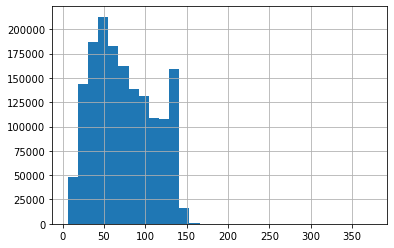

In [40]:
df['Length'].hist(bins=30)

In [41]:
df['Length'].describe()

count   1599999.00
mean         74.09
std          36.44
min           6.00
25%          44.00
50%          69.00
75%         104.00
max         374.00
Name: Length, dtype: float64

In [42]:
dep_msg=df[df['target']==4]['Length']

<AxesSubplot:>

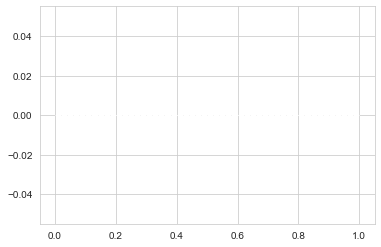

In [43]:
sns.set_style('whitegrid')
dep_msg.hist(bins=50)

<AxesSubplot:>

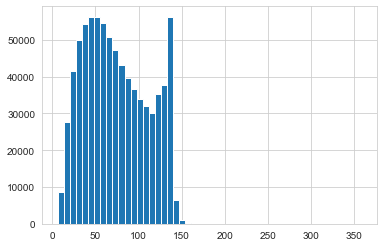

In [44]:
nondep_msg=df[df['target']==0]['Length']
sns.set_style('whitegrid')
nondep_msg.hist(bins=50)

In [45]:
nondep_msg

0           78
1           90
2           39
3           98
5           17
          ... 
1599992     63
1599993     94
1599994     15
1599997     72
1599998    135
Name: Length, Length: 799999, dtype: int64

In [27]:
dep_msg

Series([], Name: Length, dtype: int64)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

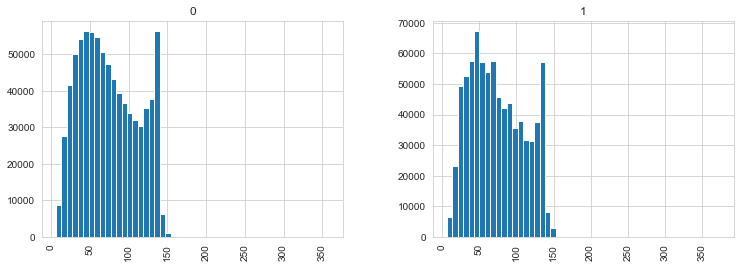

In [46]:
df.hist(column='Length',by='target',figsize=(12,4),bins=50)

# 4.Text Normalization

In [47]:
import string

In [48]:
mess='Sample msg! Nice is the :?it have memories'

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
nonpunc=[c for c in mess if c not in string.punctuation]

In [51]:
nonpunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 's',
 'g',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 'i',
 's',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 'm',
 'e',
 'm',
 'o',
 'r',
 'i',
 'e',
 's']

In [52]:
nonpunc=''.join(nonpunc)

In [53]:
nonpunc

'Sample msg Nice is the it have memories'

In [61]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksaty\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Making function of Dataset 

In [63]:
nonpunc.split()

['Sample', 'msg', 'Nice', 'is', 'the', 'it', 'have', 'memories']

In [64]:
clean_mess=[word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [65]:
clean_mess

['Sample', 'msg', 'Nice', 'memories']

In [66]:
mess

'Sample msg! Nice is the :?it have memories'

In [67]:
fclean_mess=' '.join(clean_mess)

In [68]:
fclean_mess

'Sample msg Nice memories'

In [69]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [70]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 

In [71]:
stopwords=nltk.corpus.stopwords.words('english')

In [72]:
def text_process(mess):
    """
    1.remove punctuation
    2.remove stopwords
    3.return clean words
    
    """
    nonpunc=[char for char in mess if char not in string.punctuation]
    nonpunc=''.join(nonpunc)
    
    return [word for word in nonpunc.split() if word.lower() not in stopwords]

In [73]:
df['TweetText'].head(5).apply(text_process)

0    [feel, like, theres, school, tomorrow, likely,...
1    [says, dun, think, httptinyurlcomnb9trn, httpp...
2                         [AshleyAunette, find, phone]
3    [work, best, ideas, books, blog, posts, Im, dr...
4    [updated, fansiteim, starting, kevin, jonas, w...
Name: TweetText, dtype: object

In [74]:
df['TweetText'] = df['TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,target,TweetText,Length
0,0,feel like there's school tomorrow. likely be. ...,78
1,0,says dun think http://tinyurl.com/nb9trn http:...,90
2,0,@ashleyaunette find phone?,39
3,0,work best idea's books blog posts i'm driving....,98
4,1,"updated fansite,im starting kevin jonas websit...",91


In [75]:
df['TweetText'] = df['TweetText'].str.replace(r"http\S+", "") 
df.head()

,target,TweetText,Length
0,0,feel like there's school tomorrow. likely be. ...,78
1,0,says dun think,90
2,0,@ashleyaunette find phone?,39
3,0,work best idea's books blog posts i'm driving....,98
4,1,"updated fansite,im starting kevin jonas websit...",91


In [76]:
df['TweetText'] = df['TweetText'].str.replace("@", "") 
df.head()

,target,TweetText,Length
0,0,feel like there's school tomorrow. likely be. ...,78
1,0,says dun think,90
2,0,ashleyaunette find phone?,39
3,0,work best idea's books blog posts i'm driving....,98
4,1,"updated fansite,im starting kevin jonas websit...",91


In [77]:
df['TweetText'] = df['TweetText'].str.replace("[^a-zA-Z]", " ") 
df.head()

,target,TweetText,Length
0,0,feel like there s school tomorrow likely be ...,78
1,0,says dun think,90
2,0,ashleyaunette find phone,39
3,0,work best idea s books blog posts i m driving ...,98
4,1,updated fansite im starting kevin jonas websit...,91


# 5.Data cleaning

# Check for Duplicate records

In [78]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 23590


,target,TweetText,Length
3712,1,good morning,13
3748,1,good morning,13
5301,0,,11
5889,1,goodnight,10
7205,1,good morning,13
...,...,...,...
1599805,0,jogging isnt really cool especially got fever,65
1599813,0,work,8
1599845,0,eye hurts,13
1599872,0,friend sierra wh doesnt want pic taken movi...,96


In [79]:
df.drop_duplicates(inplace=True)

In [80]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,target,TweetText,Length


# Check for missing value

<AxesSubplot:>

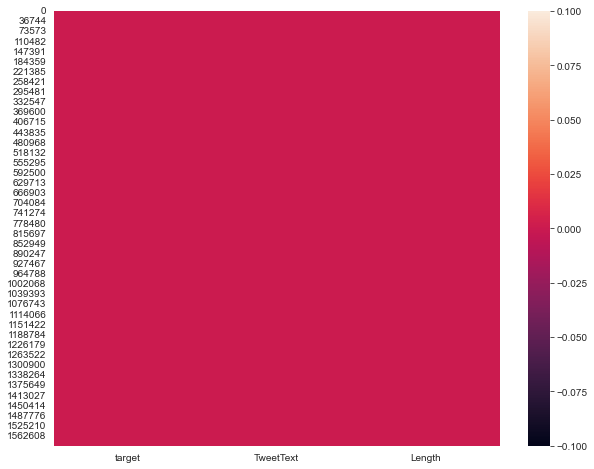

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

# 6.Model Building

In [82]:
df.head(5)

,target,TweetText,Length
0,0,feel like there s school tomorrow likely be ...,78
1,0,says dun think,90
2,0,ashleyaunette find phone,39
3,0,work best idea s books blog posts i m driving ...,98
4,1,updated fansite im starting kevin jonas websit...,91


In [83]:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df['TweetText'])
cv.shape

(1576409, 556383)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(cv,df['target'] , test_size=.3,stratify=df['target'], random_state=42)


In [86]:
X_train.shape , X_test.shape

((1103486, 556383), (472923, 556383))

# Decision tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# import xgboost as xgb

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
prediction_dt = clf_gini.predict(X_test)
print(accuracy_score(prediction_dt,y_test))

In [ ]:
# xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
# xgbc.fit(X_train,y_train)
# prediction_xgb = xgbc.predict(X_test)
# print(accuracy_score(prediction_xgb,y_test))

In [64]:
# prediction_dt_train = clf_gini.predict(X_train)
# print(accuracy_score(prediction_dt_train,y_train))

In [65]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train,y_train)
# prediction_rf = rf.predict(X_test)
# print(accuracy_score(prediction_rf,y_test))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

In [ ]:
# all_words = ' '.join([text for text in df[tweet_text]])
# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [67]:
# svc = svm.SVC()
# svc.fit(X_train,y_train)
# prediction_svc = svc.predict(X_test)
# print(accuracy_score(prediction_svc,y_test))

# Done